#### MPRA/STARR-seq Jamboree week 2021-10-25

- [ ] Task 1: wrangle all datasets into the common file-format, making sure STARR-seq based methods are reporting counts/measurements for the exact same fragments.

MPRA-based assays

In [46]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3_dev
BEDS=(\
    /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/mpra/ENCFF348WYK.bed \
    /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/mpra/GATA-MYC_Tile_K562_K562_20210130.hg38.cleaned.bed \
)
OUTDIR=/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/mpra
for ii in ${BEDS[@]};
do
    SAMPLE=$(basename ${ii})
    awk '($2!="start")&&($7!="NA")' ${ii} \
    | sed 's@Inf@1000@g' \
    | sed 's@NA@1@g' \
    | bedtools intersect \
        -wa \
        -a stdin \
        -b <(echo -e "chr8\t126736069\t128736069") \
    > ${ii/.bed/.MYC.bed}

    awk '($2!="start")&&($7!="NA")' ${ii} \
    | sed 's@Inf@1000@g' \
    | sed 's@NA@1@g' \
    | bedtools intersect \
        -wa \
        -a stdin \
        -b <(echo -e "chrX\t47786554\t49786554") \
    > ${ii/.bed/.GATA1.bed}
done    


In [3]:
%%bash
tail -n+2 /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/fads/mpra/FADS_Tile_K562_K562_20200905.hg38.bed \
| /bin/grep -v Ctrl \
| /bin/grep 200=  \
| awk '$NF!="SNV"' \
> /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/fads/mpra/FADS_Tile_K562_K562_20200905.hg38.FADS.bed


Kevin White's WG-STARR-seq data

In [ ]:
%%bash
BAMS=(\
    /data/reddylab/YoungSook/cell_specificy/White_data/downloaded_bam/K562_rep2_white.bam \
    /data/reddylab/YoungSook/cell_specificy/White_data/downloaded_bam/K562_rep1_white.bam \
    /data/reddylab/YoungSook/cell_specificy/White_data/downloaded_bam/control_HepG2_K562_white.bam \
)
OUTDIR=/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/starrseq/bams
for ii in ${BAMS[@]};
do
    SAMPLE=$(basename ${ii})
    samtools view \
        -b \
        ${ii} \
        chr8:126736069-128736069 \
        > ${OUTDIR}/${SAMPLE/.bam/.MYC.bam}
    samtools view \
        -b \
        ${ii} \
        chrX:47786554-49786554 \
        > ${OUTDIR}/${SAMPLE/.bam/.GATA1.bam}
done    

In [6]:
%%bash
module load samtools
BAMS=(\
    /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dups_marked.bam \
    /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep3.f3q10.sorted.dups_marked.bam \
    /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20201124/combined_reads/processing/starr_seq/A001_K562_20201124_combined-pe/A001-K562-rep1.f3q10.sorted.dups_marked.bam \
    /data/reddylab/kstrouse/superstarr/input_libs/A001/nextseq/processing/starr_seq/A001_nextseq-pe/rep1.f3q10.sorted.dups_marked.bam \
    /data/reddylab/kstrouse/superstarr/input_libs/A001/nextseq/processing/starr_seq/A001_nextseq-pe/rep2.f3q10.sorted.dups_marked.bam \
    /data/reddylab/kstrouse/superstarr/input_libs/A001/nextseq/processing/starr_seq/A001_nextseq-pe/rep3.f3q10.sorted.dups_marked.bam \
    /data/reddylab/kstrouse/superstarr/input_libs/A001/nextseq/processing/starr_seq/A001_nextseq-pe/rep4.f3q10.sorted.dups_marked.bam \
)
OUTDIR=/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/bam
cd ${OUTDIR}
for ii in ${BAMS[@]};
do
    SAMPLE=$(basename ${ii})
    samtools view \
        -b \
        ${ii} \
        chr8:126736069-128736069 \
        > ${OUTDIR}/${SAMPLE/.bam/.MYC.bam}
    samtools index ${OUTDIR}/${SAMPLE/.bam/.MYC.bam}
    samtools view \
        -b \
        ${ii} \
        chrX:47786554-49786554 \
        > ${OUTDIR}/${SAMPLE/.bam/.GATA1.bam}
    samtools index ${OUTDIR}/${SAMPLE/.bam/.GATA1.bam}
done

# Rename samples
# 
for REP in 1 2 3 4;
do
    rename rep${REP}.f3q10.sorted.dups_marked. A001.K562.starrseq.input.rep${REP}. rep${REP}.f3q10.sorted.dups_marked.*    
    rename A001-K562-rep${REP}.f3q10.sorted.dups_marked. A001.K562.starrseq.output.rep${REP}. A001-K562-rep${REP}.f3q10.sorted.dups_marked.*
    rename K562_rep${REP}_white KW.K562.starrseq.output.rep${REP} K562_rep${REP}_white*
done
rename control_HepG2_K562_white KW.K562.starrseq.input.rep1 control_HepG2_K562_white*


In [8]:
%%bash
module load samtools
#     /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep1.f3q10.sorted.with_umis.dups_marked.bam \
#     /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep2.f3q10.sorted.with_umis.dups_marked.bam \
#     /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep3.f3q10.sorted.with_umis.dups_marked.bam \
#     /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.f3q10.sorted.with_umis.dups_marked.bam \
BAMS=(\
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep1.masked.dups_marked.sorted.bam \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep2.masked.dups_marked.sorted.bam \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep3.masked.dups_marked.sorted.bam \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep4.masked.dups_marked.sorted.bam \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep5.masked.dups_marked.sorted.bam \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep6.masked.dups_marked.sorted.bam \
)
OUTDIR=/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/starrseq/bams
cd ${OUTDIR}
for ii in ${BAMS[@]};
do
    SAMPLE=$(basename ${ii})
    if [[ ! -e ${ii}.bai ]];
    then
        samtools index ${ii}
    fi
    samtools view \
        -F 1024 \
        -b \
        ${ii} \
        chr8:126736069-128736069 \
        > ${OUTDIR}/${SAMPLE/.bam/.MYC.bam}
    samtools index ${OUTDIR}/${SAMPLE/.bam/.MYC.bam}
    samtools view \
        -F 1024 \
        -b \
        ${ii} \
        chrX:47786554-49786554 \
        > ${OUTDIR}/${SAMPLE/.bam/.GATA1.bam}
    samtools index ${OUTDIR}/${SAMPLE/.bam/.GATA1.bam}
#     samtools view \
#         -b \
#         ${ii} \
#         chr11:61787329-61898348 \
#         > ${OUTDIR}/../fads/starrseq/${SAMPLE/.bam/.FADS.bam}
#     samtools index ${OUTDIR}/../fads/starrseq/${SAMPLE/.bam/.FADS.bam}
done



In [ ]:
%%bash
cd /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/bed
awk '$2!="NA"' GATA-MYC_Tile_K562_K562_20210130.hg38.bed \
| awk -vOFS="\t" 'NR!=1{$1="chr"$1}{print}' \
> GATA-MYC_Tile_K562_K562_20210130.hg38.cleaned.bed

Next, extract fragment counts from each file:
- [X] `bedtools bamtobed -bedpe`
- [X] `cut -f 1, 2, 6`
- [X] sort/uniq for counting

In [2]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3_dev
OUTDIR=/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/starrseq
cd ${OUTDIR}
mkdir -p fragments
for ii in bams/KS91_K562_hg38_ASTARRseq_Input_rep*sorted*bam;
do
    SAMPLE=$(basename ${ii})
    samtools sort -n  \
        ${ii} \
    | bedtools bamtobed \
        -bedpe \
        -mate1 \
        -i stdin \
    2> /dev/null \
    | awk -vOFS="@" '{if($2>$5){TMP=$2; $2=$5; $5=TMP}; if($3>$6){TMP=$3; $3=$6; $6=TMP}print $1, $2, $6, $(NF-1)}' \
    | sort \
    | uniq -c \
    | awk -vOFS="\t" '{print $2, $1}' \
    | sed 's/@/\t/g' \
    | sort -k1,1 -k2,2n \
    | awk -vOFS="\t" '{print $1, $2, $3, $1"_"$2"_"$3"_"$4, $5, $4}' \
    > fragments/${SAMPLE/.bam/.fragment_counts.stranded.bed}
done    
    

In [7]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3_dev
OUTDIR=/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/fads/starrseq
cd ${OUTDIR}
mkdir -p fragments
for ii in bams/*bam;
do
    SAMPLE=$(basename ${ii})
    samtools sort -n  \
        ${ii} \
    | bedtools bamtobed \
        -bedpe \
        -mate1 \
        -i stdin \
    2> /dev/null \
    | awk -vOFS="@" '{if($2>$5){TMP=$2; $2=$5; $5=TMP}; if($3>$6){TMP=$3; $3=$6; $6=TMP}print $1, $2, $6, $(NF-1)}' \
    | sort \
    | uniq -c \
    | awk -vOFS="\t" '{print $2, $1}' \
    | sed 's/@/\t/g' \
    | sort -k1,1 -k2,2n \
    | awk -vOFS="\t" '{print $1, $2, $3, $1"_"$2"_"$3"_"$4, $5, $4}' \
    > fragments/${SAMPLE/.bam/.fragment_counts.stranded.bed}
done    
    

In [ ]:
%%bash
OUTDIR=/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/starrseq/fragments
cd ${OUTDIR}
for ii in KS91_K562_hg38_ASTARRseq_Input_rep*fragment_counts.stranded.bed;
do
    sort -k4,4 ${ii} \
        | awk -vOFS="\t" 'LAST==$1$2$3{CC+=$5}LAST!=$1$2$3{print L1, L2, L3, L1"_"L2"_"L3,CC,"."; CC=$5}{LAST=$1$2$3;L1=$1;L2=$2;L3=$3}END{print L1, L2, L3, L1"_"L2"_"L3,CC,"."}' \
        | tail -n+2 \
        > ${ii/.fragment_counts.stranded.bed/.fragment_counts.unstranded.bed}
done

In [8]:
%%bash
OUTDIR=/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/fads/starrseq/fragments
cd ${OUTDIR}
for ii in *fragment_counts.stranded.bed;
do
    sort -k4,4 ${ii} \
        | awk -vOFS="\t" 'LAST==$1$2$3{CC+=$5}LAST!=$1$2$3{print L1, L2, L3, L1"_"L2"_"L3,CC,"."; CC=$5}{LAST=$1$2$3;L1=$1;L2=$2;L3=$3}END{print L1, L2, L3, L1"_"L2"_"L3,CC,"."}' \
        | tail -n+2 \
        > ${ii/.fragment_counts.stranded.bed/.fragment_counts.unstranded.bed}
done

Merge all counts per experiment into a joined dataframe/table of counts

In [6]:
def clean_up_name(x, suffices = [".masked", ".dups_marked", ".f3q10", ".sorted", ".with_umis"]):
    for s in suffices:
        x = x.replace(s, '')
    return x


In [9]:
import pandas as pd
import os
from functools import reduce

bed6_headers = ["chrom", "start", "end", "name", "count", "strand"]
data_dir = '/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/starrseq/fragments/'
groups = ['KS91_K562_hg38_ASTARRseq'] # 'A001.K562.starrseq', 'KW.K562.starrseq'
loci = ["MYC", "GATA1"]#, "GATA1"
strandnesses = ["unstranded", "stranded"]
for locus in loci:
    for gg in groups:
        for strandness in strandnesses:
            merged = pd.DataFrame()
            for ii in sorted(os.listdir(data_dir)):
                if 'sorted' in ii and ii.endswith('.%s.bed' % strandness) and gg in ii and locus in ii:
                    sample_id = clean_up_name(ii.split("."+locus)[0])
                    tmp = pd.read_csv("%(data_dir)s/%(fn)s" % {'data_dir': data_dir, 'fn': ii}, 
                                      sep='\t', 
                                      names=[c+"_"+sample_id for c in bed6_headers],
                                      index_col="name_"+sample_id)
                    merged = merged.join(tmp.iloc[:, 3], how='outer')
            merged.columns = [c.replace("count_", "") for c in merged.columns]
            merged.fillna(0)\
                .astype(int)\
                .to_csv("%(data_dir)s/%(group)s.%(locus)s.%(strandness)s.counts.txt" \
                              % {'data_dir': data_dir, 'group': gg, 
                                 'strandness': strandness, 'locus': locus},
                         sep="\t")

In [2]:
import pandas as pd
import os
from functools import reduce

bed6_headers = ["chrom", "start", "end", "name", "count", "strand"]
data_dir = '/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/fads/starrseq/fragments/'
groups = ['KS91_K562_hg38_ASTARRseq'] # 'A001.K562.starrseq', 'KW.K562.starrseq'
loci = ["FADS"]#"MYC", "GATA1"
strandnesses = ["unstranded", "stranded"]
for locus in loci:
    for gg in groups:
        for strandness in strandnesses:
            merged = pd.DataFrame()
            for ii in sorted(os.listdir(data_dir)):
                if ii.endswith('.%s.bed' % strandness) and gg in ii and locus in ii:
                    sample_id = clean_up_name(ii.split("."+locus)[0])
                    tmp = pd.read_csv("%(data_dir)s/%(fn)s" % {'data_dir': data_dir, 'fn': ii}, 
                                      sep='\t', 
                                      names=[c+"_"+sample_id for c in bed6_headers],
                                      index_col="name_"+sample_id)
                    merged = merged.join(tmp.iloc[:, 3], how='outer')
            merged.columns = [c.replace("count_", "") for c in merged.columns]
            merged.fillna(0)\
                .astype(int)\
                .to_csv("%(data_dir)s/%(group)s.%(locus)s.%(strandness)s.counts.txt" \
                              % {'data_dir': data_dir, 'group': gg, 
                                 'strandness': strandness, 'locus': locus},
                         sep="\t")

Run DESeq2 on these experiments. Leave KW out since it only has one control (DESeq2 won't work with unreplicated experiments. Ask if the other control can be used here).

In [2]:
pwd

'/gpfs/fs1/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree'

In [4]:
%%bash
mkdir -p logs
mkdir -p results/deseq2

In [6]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex_dev
module load gcc
sbatch -p all \
    --array=0 \
    --mem 16G \
    -o /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/logs/de.deseq2.%a.out \
    <<'EOF'
#!/bin/bash
COMPARISONS=( \
    KS91_K562_hg38_ASTARRseq_Output@KS91_K562_hg38_ASTARRseq_Input \
)

COMPARISON=${COMPARISONS[${SLURM_ARRAY_TASK_ID}]}
TREAT=$(echo $COMPARISON | cut -d"@" -f1)
CONTROL=$(echo $COMPARISON | cut -d"@" -f2)
Rscript /data/reddylab/Alex/reddylab_utils/scripts/de.deseq2.R \
    --treatments $(echo ${TREAT}_rep{1,2,3,4}) \
    --controls $(echo ${CONTROL}_rep{1,2,3,4}) \
    --counts-only-treatments-and-controls \
    --lfcShrink ashr \
    --rep-sep "_" \
    --outdir /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/results/deseq2/ \
    --counts /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/starrseq/fragments/KS91_K562_hg38_ASTARRseq.GATA1.unstranded.counts.txt
EOF

Submitted batch job 26702177


In [7]:
%%writefile /data/reddylab/Alex/reddylab_utils/scripts/de.deseq2.R
#!/usr/bin/env Rscript
suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(matrixStats))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library("argparse"))

# Rewrite DESeq2 plotPCA function to specify which PC to plot
plotPCA_ = function(object, intgroup="condition", ntop=500, returnData=FALSE, pcX=1, pcY=2, ignoreReps=FALSE)
{
  # calculate the variance for each gene
  rv <- rowVars(assay(object))

  # select the ntop genes by variance
  select <- order(rv, decreasing=TRUE)[seq_len(min(ntop, length(rv)))]

  # perform a PCA on the data in assay(x) for the selected genes
  pca <- prcomp(t(assay(object)[select,]))

  # the contribution to the total variance for each component
  percentVar <- pca$sdev^2 / sum( pca$sdev^2 )

  if (!all(intgroup %in% names(colData(object)))) {
    stop("the argument 'intgroup' should specify columns of colData(dds)")
  }

  intgroup.df <- as.data.frame(colData(object)[, intgroup, drop=FALSE])  
  # add the intgroup factors together to create a new grouping factor
  group <- if (length(intgroup) > 1) {
    factor(apply( intgroup.df, 1, paste, collapse=":"))
  } else {
    colData(object)[[intgroup]]
  }
    
  if (returnData) {
    attr(d, "percentVar") <- c(percentVar[pcX], percentVar[pcY])
    return(d)
  }
  rep <- colData(object)[['rep']]
#   rep <- row.names(colData(dds))
  if (!ignoreReps){
      # Add replicate info
#       rep <- colData(object)[['rep']]

        # assembly the data for the plot
      d <- data.frame(PCX=pca$x[,pcX], PCY=pca$x[,pcY], group=group, rep=rep, intgroup.df, name=colnames(object))

      ggplot(data=d, aes_string(x="PCX", y="PCY", color="group", shape="rep")) + geom_point(size=3) + 
        xlab(paste0("PC", pcX, ": ",round(percentVar[pcX] * 100),"% variance")) +
          ylab(paste0("PC", pcY, ": ",round(percentVar[pcY] * 100),"% variance")) +
      scale_shape_manual(values=seq(0,15))
  } else {
#       batch <- as.factor(colData(object)[['batch']])
        # assembly the data for the plot
      d <- data.frame(PCX=pca$x[,pcX], PCY=pca$x[,pcY], group=group, intgroup.df, name=colnames(object))

      ggplot(data=d, aes_string(x="PCX", y="PCY", color="group")) + 
          geom_point(size=3) +
          geom_text(aes(label=rep),hjust=0, vjust=0) +
          xlab(paste0("PC", pcX, ": ",round(percentVar[pcX] * 100),"% variance")) +
          ylab(paste0("PC", pcY, ": ",round(percentVar[pcY] * 100),"% variance")) +
      scale_shape_manual(values=seq(0,15))
  }
#     + coord_fixed()
}

# create parser object
parser <- ArgumentParser()

# specify our desired options 
# by default ArgumentParser will add an help option 
parser$add_argument("-c", "--controls", nargs="+", help="Featurecounts file for controls")
parser$add_argument("-t", "--treatments", nargs="+", help="Featurecounts file for treatments")
parser$add_argument("--counts", nargs="+", help="Count matrix (or matrices). Count columns should match controls and treatments specified")
parser$add_argument("--outdir", help="Output directory where result files will be saved.")
parser$add_argument("--lfcShrink", required=F, 
                    help="Perform effect size shrinkage (types: normal, apeglm and ashr. See Zhu, Ibrahim, and Love 2018).")
parser$add_argument("--lib-sizes", required=F, 
                    help="Use library sizes as scaling factor overwritting the default total counts per library")
parser$add_argument("--counts-skip-ncols", required=F, 
                    help="Skip n first columns from count matrix")
parser$add_argument("--counts-only-treatments-and-controls", required=F, action="store_true", default=FALSE,
                    help="Keep only the counts from the treatment and control samples (affects dispersion estimates, but can speed up things significantly)")
parser$add_argument("--no-filter", required=F, action="store_true", default=FALSE,
                    help="By default, lowly expressed regions in only 1 sample are removed. Specify if no filter should be done")
parser$add_argument("--no-model-reps", required=F, action="store_true", default=FALSE,
                    help="Ignore replicates when plotting PCA components")
parser$add_argument("--norm-by-ercc", required=F, action="store_true", default=FALSE,
                    help="Normalized using ERCC counts (probes staring by ERCC-)")
parser$add_argument("--samples-info-df", required=F,
                    help="Optionally, provide a DataFrame with sample info (which in DESeq2 is used as column data)")
parser$add_argument("--design-formula", required=F,
                    help="Optionally, if provided, use this design formular instead of trying to infer it from data")
parser$add_argument("--control-substr", required=F, default=FALSE,
                    help="Optionally, provide a substr found in rownames to identify control counts (e.g. housekeeping genes, spike-ins, etc.). It changes the estimateSizeFactors function")
parser$add_argument("--pca-int-groups", required=F, nargs='*',
                    help="Optionally, columns from design formula to be used in PCA analysis")
parser$add_argument("--rep-sep", required=F, default=".",
                    help="Optionally, replicate separator in sample names")

# get command line options, if help option encountered print help and exit,
# otherwise if options not found on command line then set defaults, 
args <- parser$parse_args()
args
treatments <- args$treatments
controls <- args$controls
outdir <- args$outdir

ff <- args$counts
dd <- lapply(ff, read.csv, header=TRUE, sep="\t", stringsAsFactors=FALSE, row.names=1)
xx <- do.call(cbind, dd)

countData <- xx
if (!is.null(args$counts_skip_ncols)){
    countData <- xx[, -c(1:args$counts_skip_ncols)]
}

colnames(countData)[colnames(countData)%in%append(treatments, controls)]
if (args$counts_only_treatments_and_controls){
#     countData <- xx %>% select(unlist(append(treatments, controls)))
    countData <- subset(xx, select = colnames(countData)[colnames(countData)%in%append(treatments, controls)])
}

controls
treatments
samples_no_reps <- gsub(paste0("(.*)\\", args$rep_sep, ".*"), "\\1", colnames(countData))
# samples_no_reps <- gsub("(.*)\\..*", "\\1", colnames(countData))
reps <- gsub(paste0(".*\\", args$rep_sep, "(.*)"), "\\1", colnames(countData))
# reps <- gsub(".*\\.(.*)", "\\1", colnames(countData))
conditions <- samples_no_reps
conditions

# Reorder condition comparisons to always compute log2 fold changes of treat vs control
conditions_pair <- unique(conditions)
control_conditions <- unique(gsub(paste0("(.*)\\", args$rep_sep, ".*"), "\\1", controls)) #"(.*)\\..*"
treatment_conditions <- unique(gsub(paste0("(.*)\\", args$rep_sep, ".*"), "\\1", treatments))

if (!is.null(args$samples_info_df)){
    colData <- read.csv(args$samples_info_df, 
                        header=TRUE, sep="\t", 
                        stringsAsFactors=TRUE, row.names=1)
    colData <- colData[colnames(countData), ]
    design_formula_str <- paste(c("~ ", paste(colnames(colData), collapse = " + ")), collapse='')
    if (!is.null(args$design_formula)){
        design_formula_str <- args$design_formula
    }
    print(design_formula_str)
    dds <- DESeqDataSetFromMatrix(countData = countData,
                                  colData = colData,
                                  design = formula(design_formula_str))
    intgroup <- colnames(colData)  # For PCA plots
} else {
    intgroup <- c("condition")  # For PCA plots
    colData <- data.frame(condition=conditions, rep=reps, row.names=colnames(countData))    
    if (!(args$no_model_reps)){
        print(reps)
    #     colData <- data.frame(condition=conditions, rep=reps, row.names=colnames(countData))
        dds <- DESeqDataSetFromMatrix(countData = countData,
                                      colData = colData,
                                      design = ~ rep + condition)
    } else {
    #     colData <- data.frame(condition=conditions, row.names=colnames(countData))
        dds <- DESeqDataSetFromMatrix(countData = countData,
                                      colData = colData,
                                      design = ~ condition)
    }
    # Relevel to setup control as reference
    dds$condition <- relevel(dds$condition, ref = control_conditions)
} 


# Optionally: if lib_sizes provided, manually assigned scale factors
if (!is.null(args$lib_sizes)){
    lib_sizes <- read.table(args$lib_sizes, sep="\t", row.names=1)
    lib_sizes <- lib_sizes[colnames(countData), ]
    lib_sizes_scale_factors <- lib_sizes/min(lib_sizes)
    sizeFactors(dds) <- lib_sizes_scale_factors    
}

if (args$norm_by_ercc){
    ercc_genes <- countData[grepl("^ERCC", rownames(countData)), ]
    dds <- DESeqDataSetFromMatrix(countData = countData[!grepl("^ERCC", rownames(countData)), ],
                              colData = colData,
                              design = ~ condition)
    ercc_dds <- DESeqDataSetFromMatrix(countData = ercc_genes, 
                                       colData = colData,
                                       design = ~ condition)
    sizeFactors(dds) <-  sizeFactors(estimateSizeFactors(ercc_dds))
    # Relevel to setup control as reference
    dds$condition <- relevel(dds$condition, ref = control_conditions)
}

# Pre-filtering low count genes
# dds <- dds[ rowSums(counts(dds)) > 5, ]
if (!args$no_filter){
    dds <- dds[ rowSums(fpm(dds, robust = FALSE)>=2) > 1, ]
}

# Run DESeq2
# dds <- DESeq(dds, betaPrior=FALSE)
if (is.character(args$control_substr)){
    control_idxs <- which(grepl(args$control_substr, rownames(countData)))
    dds <- estimateSizeFactors(dds, controlGenes=control_idxs)
} else {
    dds <- estimateSizeFactors(dds)
}
dds <- estimateDispersions(dds)
dds <- nbinomWaldTest(dds)


# Calculate comparison string name 
treat_vs_contr <- paste0(treatment_conditions, '_vs_', control_conditions)

# Extracting transformed values for PCA analysis
vsd <- tryCatch({
    vst(dds, blind=FALSE)
}, error = function(e){
    varianceStabilizingTransformation(dds, blind=FALSE)
})


# Create PCA plot for the first and second PCs
pdf(paste0(outdir, '/', treat_vs_contr, '.pca.1_vs_2.pdf'), width=10, height=8)
plotPCA_(vsd, intgroup=intgroup, ntop=500, pcX=1, pcY=2, ignoreReps=args$no_model_reps)
dev.off()
# Create PCA plot for the second and third PCs
pdf(paste0(outdir, '/', treat_vs_contr, '.pca.2_vs_3.pdf'), width=10, height=8)
plotPCA_(vsd, intgroup=intgroup, ntop=500, pcX=2, pcY=3, ignoreReps=args$no_model_reps)
dev.off()
# Create PCA plot for the third and fourth PCs
pdf(paste0(outdir, '/', treat_vs_contr, '.pca.3_vs_4.pdf'), width=10, height=8)
plotPCA_(vsd, intgroup=intgroup, ntop=500, pcX=3, pcY=4, ignoreReps=args$no_model_reps)
dev.off()

c('condition',  
  conditions_pair[conditions_pair %in% treatment_conditions], 
  conditions_pair[conditions_pair %in% control_conditions])
res <- results(dds, 
               contrast=c('condition', 
                          conditions_pair[conditions_pair %in% treatment_conditions],
                          conditions_pair[conditions_pair %in% control_conditions]), 
               alpha=0.05, 
               independentFiltering=F)  # TODO: Test how the results look without independent filtering

# Print out result names
resultsNames(dds)

# Shrink log2 fold-change values?
if (!is.null(args$lfcShrink)){
    # If lfcShrinkage specified, save unshrunk values
    resOrdered <- res[order(res$padj),]

    # Save sorted results in a text file
    write.table(resOrdered, 
                file=paste0(outdir, '/', treat_vs_contr, '.unshrunk.txt'),
                quote = FALSE, row.names=TRUE, sep = '\t')

    # Create plot for the log2 fold changes from the treatment over the mean of normalized counts
    pdf(paste0(outdir, '/', treat_vs_contr, '.unshrunk.pdf'))
    log2fc_lim <- ceiling(max(max(res$log2FoldChange), abs(min(res$log2FoldChange))))
    plotMA(res, main=paste0("DESeq2_unshrunk_lfc_", treat_vs_contr), ylim=c(-log2fc_lim,log2fc_lim))
    dev.off()

    # Calculate lfcShrink values
    targ_contrast <- paste0("condition_", treat_vs_contr)
    res <- lfcShrink(dds, 
                     coef=targ_contrast, 
                     type=args$lfcShrink)
}

# Sort by adjusted p-value (FDR)
(resOrdered <- res[order(res$padj),])

# Print out summary of results
summary(resOrdered, alpha=0.05)

# Try IHW multiple hypothesis testing package
library("IHW")
resIHW <- results(dds, 
                  alpha=0.05,
                  contrast=c('condition', 
                          conditions_pair[conditions_pair %in% treatment_conditions],
                          conditions_pair[conditions_pair %in% control_conditions]),
                  filterFun=ihw
                 )
summary(resIHW, alpha=0.05)
resIHW <- resIHW[order(resIHW$padj),]

# Create plot for the log2 fold changes from the treatment over the mean of normalized counts
log2fc_lim <- ceiling(max(max(res$log2FoldChange), abs(min(res$log2FoldChange))))
pdf(paste0(outdir, '/', treat_vs_contr, '.pdf'))
plotMA(res, main=paste0("DESeq2_", treat_vs_contr), ylim=c(-log2fc_lim,log2fc_lim))
dev.off()

# Create plot for dispersion of normalized counts
pdf(paste0(outdir, '/', treat_vs_contr, '.mean_counts_dispersion.pdf'))
plotDispEsts(dds)
dev.off()

# To check if there are too many outliers, plot the Cook distances 
pdf(paste0(outdir, '/', treat_vs_contr, '.cook_distances.pdf'))
par(mar=c(8,5,2,2))
boxplot(log10(assays(dds)[["cooks"]]), range=0, las=2)
dev.off()

# Save sorted results in a text file
write.table(resOrdered, 
            file=paste0(outdir, '/', treat_vs_contr, '.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')

# Save IHW results in a text file
write.table(resIHW, 
            file=paste0(outdir, '/', treat_vs_contr, '.IHW.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')

# Save vsd transformed values
write.table(assay(vsd), 
            file=paste0(outdir, '/', treat_vs_contr, '.vsd.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')


rld <- rlog(dds) # rlog transformed values (typically used for clustering - see DESeq2 manual for details)
# Save rlog transformed values
write.table(assay(rld), 
            file=paste0(outdir, '/', treat_vs_contr, '.rlog.txt'),
            quote = FALSE, row.names=TRUE, sep = '\t')

# Save .RData object
save.image(paste0(outdir, '/', treat_vs_contr, '.RData'))

cat("Done!")


Overwriting /data/reddylab/Alex/reddylab_utils/scripts/de.deseq2.R


In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2
from matplotlib import pyplot as plt

What's the overlap at the fragment level for ASTARR samples? 

In [7]:
gata1 = pd.read_csv("/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/starrseq/fragments/KS91_K562_hg38_ASTARRseq.GATA1.unstranded.counts.txt", 
                    sep="\t", index_col=0)

Text(0.5, 1.0, 'GATA1 locus\nfragments with >0 counts in >0 rep')

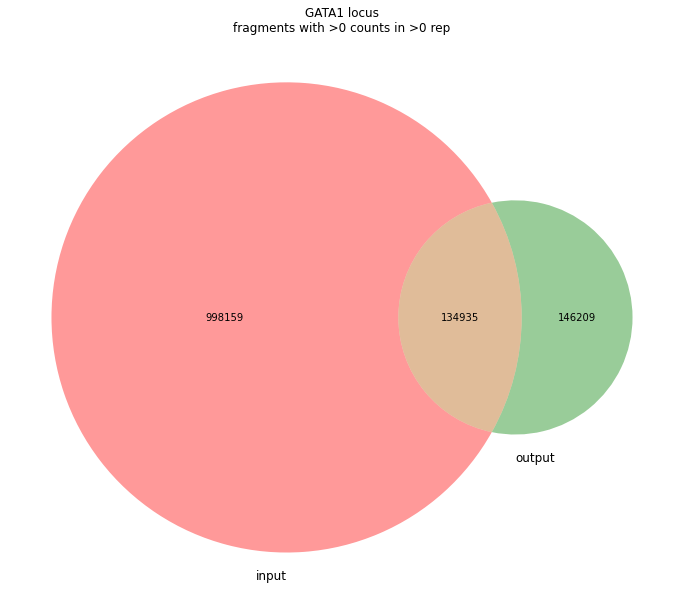

In [49]:
fig, ax = plt.subplots(figsize=[12, 12])
venn2([
    set(gata1.loc[gata1.iloc[:, :6 ].max(axis=1)>0, :].index.values),
    set(gata1.loc[gata1.iloc[:, 6:].max(axis=1)>0, :].index.values)], set_labels=['input', 'output'])
plt.title("GATA1 locus\nfragments with >0 counts in >0 rep")

Text(0.5, 1.0, 'GATA1 locus\nfragments with >0 counts in ALL reps')

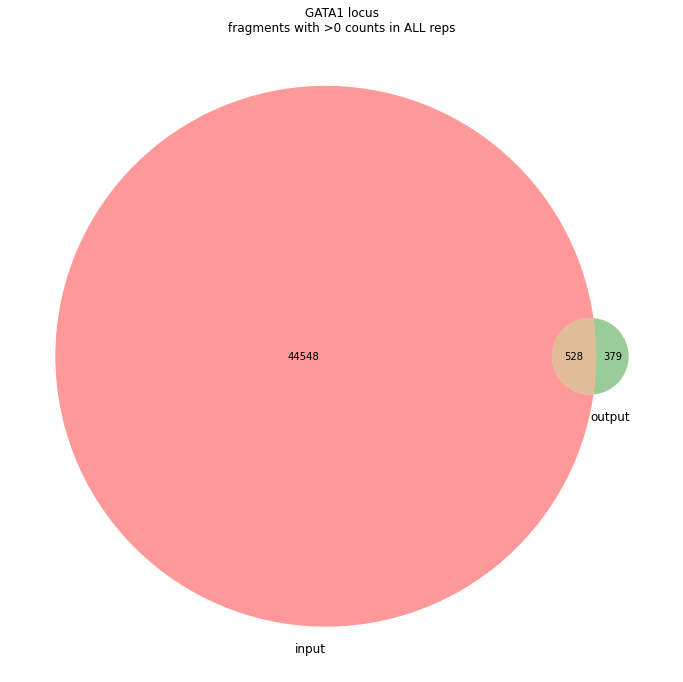

In [48]:
fig, ax = plt.subplots(figsize=[12, 12])
venn2([
    set(gata1.loc[gata1.iloc[:, :6].min(axis=1)>0, :].index.values),
    set(gata1.loc[gata1.iloc[:, 6:].min(axis=1)>0, :].index.values)], set_labels=['input', 'output'])
plt.title("GATA1 locus\nfragments with >0 counts in ALL reps")

In [41]:
myc = pd.read_csv("/data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211025_MPRA_STARR_Jamboree/data/gata1_myc/starrseq/fragments/KS91_K562_hg38_ASTARRseq.MYC.unstranded.counts.txt", 
                    sep="\t", index_col=0)

Text(0.5, 1.0, 'MYC locus\nfragments with >0 counts in >0 rep')

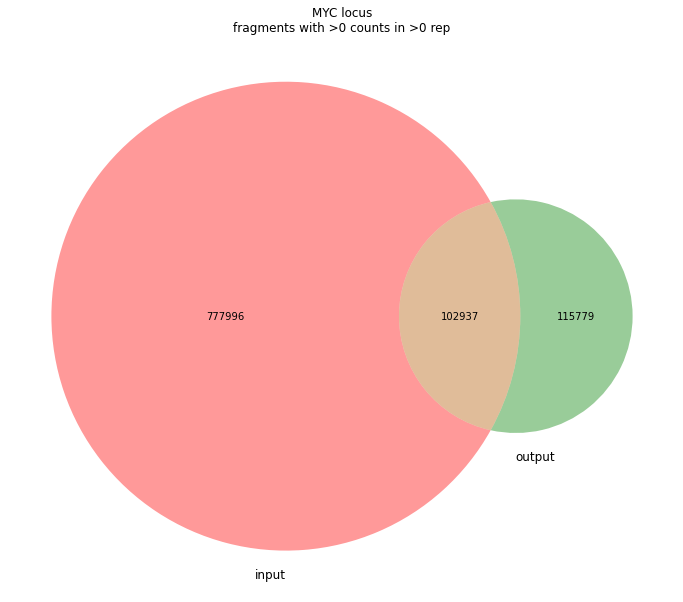

In [50]:
fig, ax = plt.subplots(figsize=[12, 12])
venn2([
    set(myc.loc[myc.iloc[:, :6].max(axis=1)>0, :].index.values),
    set(myc.loc[myc.iloc[:, 6:].max(axis=1)>0, :].index.values)], set_labels=['input', 'output'])
plt.title("MYC locus\nfragments with >0 counts in >0 rep")

Text(0.5, 1.0, 'MYC locus\nfragments with >0 counts in ALL reps')

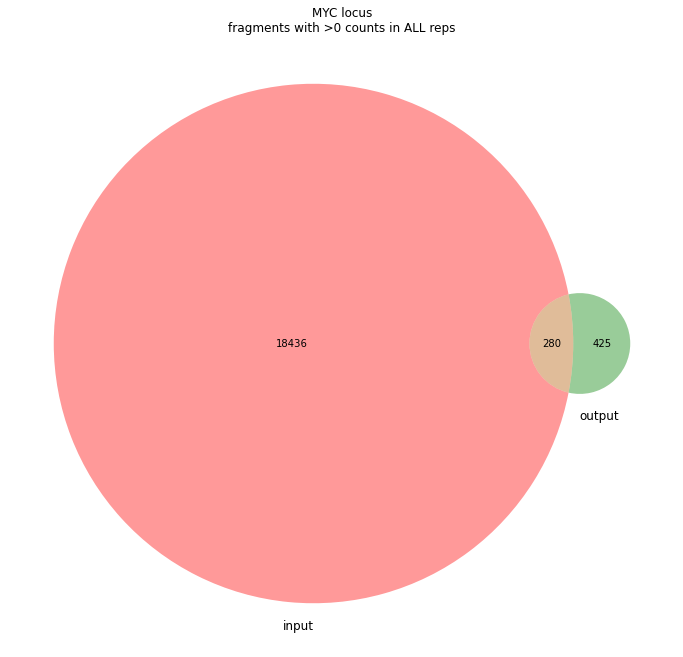

In [51]:
fig, ax = plt.subplots(figsize=[12, 12])
venn2([
    set(myc.loc[myc.iloc[:, :6].min(axis=1)>0, :].index.values),
    set(myc.loc[myc.iloc[:, 6:].min(axis=1)>0, :].index.values)], set_labels=['input', 'output'])
plt.title("MYC locus\nfragments with >0 counts in ALL reps")